# Goal of this project is to predict the Amazon stock price's for 2030.

In [103]:
import pandas as pd

df = pd.read_csv('../data/AMZN_stock_data.csv')

In [104]:
# Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [105]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], utc = True)

# Check the first few rows again to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6987 non-null   datetime64[ns, UTC]
 1   Open          6987 non-null   float64            
 2   High          6987 non-null   float64            
 3   Low           6987 non-null   float64            
 4   Close         6987 non-null   float64            
 5   Volume        6987 non-null   int64              
 6   Dividends     6987 non-null   float64            
 7   Stock Splits  6987 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 436.8 KB


In [106]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [107]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Duplicate Rows: 0


# Getting an overview of the whole stock, how it has progressed so far.

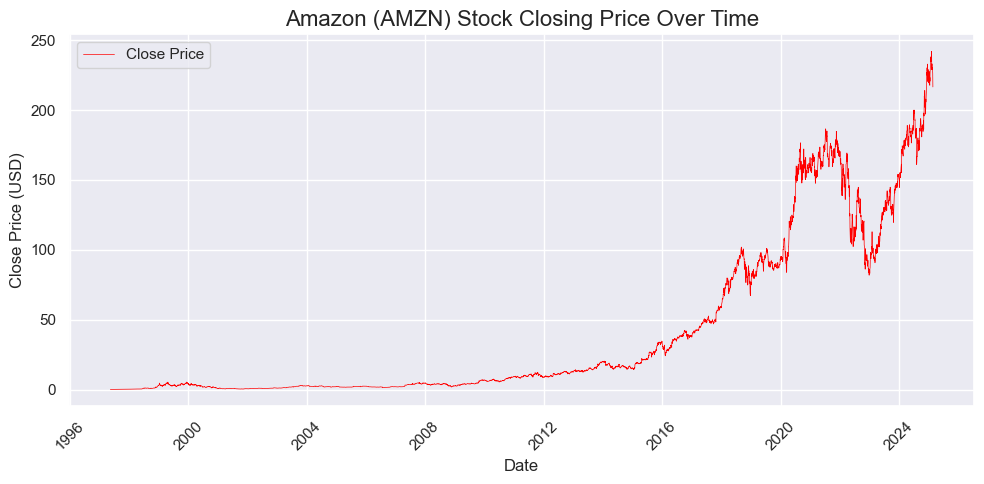

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="darkgrid")

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='red', lw=0.5)

# Add labels and title
plt.title('Amazon (AMZN) Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plota
plt.tight_layout()
plt.legend()
plt.savefig('../images/stock_closing_prices.png')
plt.show()


# Creating lags for 1, 5, 30 days and rolling averages for 5 and 30 days period.

In [109]:
# Create lag features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_5'] = df['Close'].shift(5)
df['Lag_30'] = df['Close'].shift(30)

# Create rolling average features
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Remove missing values after creating lag features
df = df.dropna()

# Check the first few rows to verify
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Lag_1,Lag_5,Lag_30,MA_5,MA_30
30,1997-06-27 04:00:00+00:00,0.075781,0.075781,0.073958,0.074479,23760000,0.0,0.0,0.075521,0.076302,0.097917,0.075208,0.077109
31,1997-06-30 04:00:00+00:00,0.075521,0.079948,0.073958,0.077083,54936000,0.0,0.0,0.074479,0.075000,0.086458,0.075625,0.076797
32,1997-07-01 04:00:00+00:00,0.077083,0.077083,0.075521,0.075781,25848000,0.0,0.0,0.077083,0.075521,0.085417,0.075677,0.076476
33,1997-07-02 04:00:00+00:00,0.075781,0.079688,0.075521,0.079427,77640000,0.0,0.0,0.075781,0.075521,0.081771,0.076458,0.076398
34,1997-07-03 04:00:00+00:00,0.079948,0.095833,0.079688,0.095573,251544000,0.0,0.0,0.079427,0.075521,0.071354,0.080469,0.077205


# Spliting our data to a train set and a test set, ensuring that we test the model on unseen data to avoid overfitting.

In [110]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df[['Lag_1', 'Lag_5', 'Lag_30', 'MA_5', 'MA_30']]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the splits
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (5565, 5), Test data shape: (1392, 5)


# Training a Linear Regression Model

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr) ** 0.5

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 2.0142
Mean Squared Error (MSE): 7.4923
Root Mean Squared Error (RMSE): 2.7372


# Lets try a different algorithm (Random Forest) to see if we can achieve better results.

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Print results
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

Random Forest - Mean Absolute Error (MAE): 46.8335
Random Forest - Mean Squared Error (MSE): 3362.5568
Random Forest - Root Mean Squared Error (RMSE): 57.9876


# Since Random Forest is performing bad, we will try SVM.

In [113]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create the SVR model with a radial basis function (RBF) kernel (default)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Print the results
print(f"SVM - Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"SVM - Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"SVM - Root Mean Squared Error (RMSE): {rmse_svr:.4f}")


SVM - Mean Absolute Error (MAE): 82.3822
SVM - Mean Squared Error (MSE): 8329.9712
SVM - Root Mean Squared Error (RMSE): 91.2687


# How the model is performing for Linear Regression? (Visualizing it)

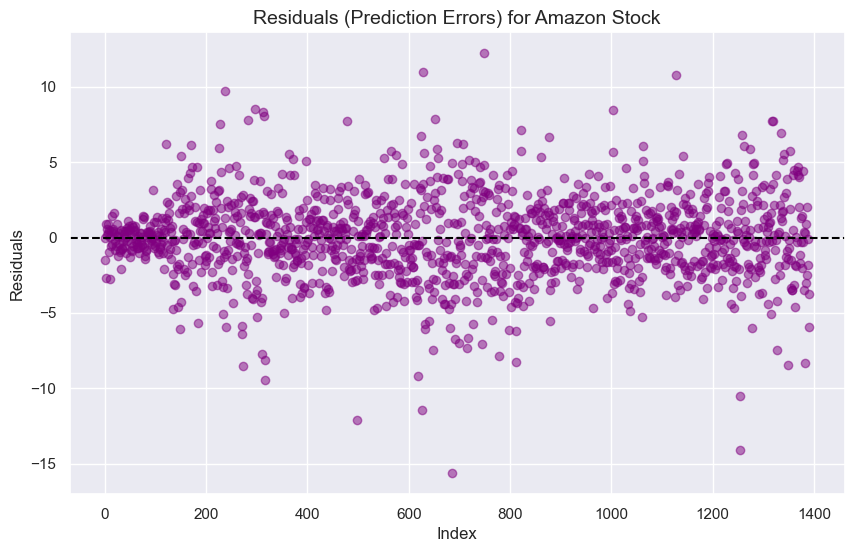

In [114]:
# Calculate residuals
residuals = y_test - y_pred_lr


# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Prediction Errors) for Amazon Stock', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.savefig('../images/predication_errors.png')
plt.show()


Predicted Stock Price for Amazon in 2030: 220.32
Predicting stock prices for 2030 based on historical data is uncertain.
Stock prices are affected by many external factors, such as market conditions, political events, and economic changes.
These factors are not accounted for in the model, making long-term predictions highly speculative.


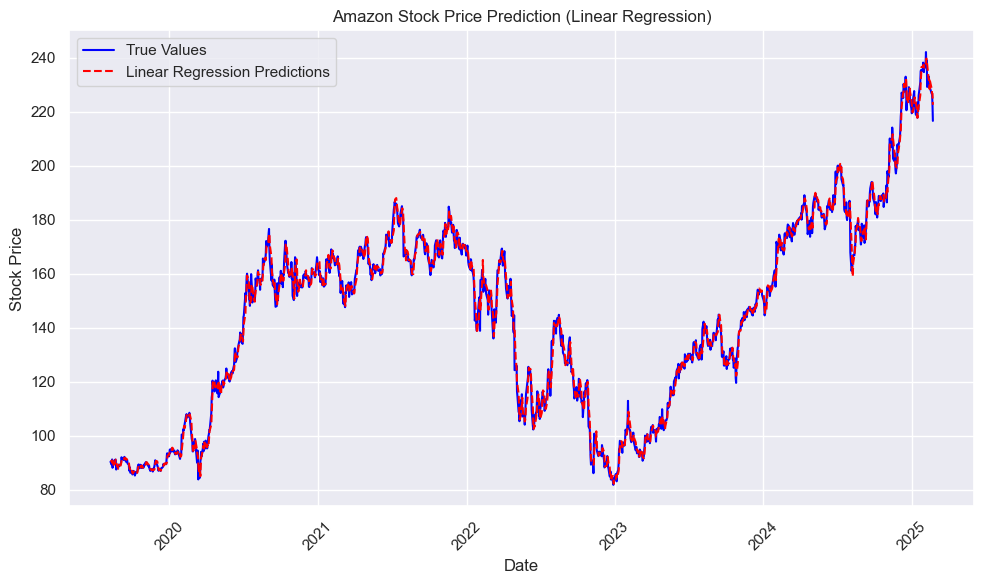

In [115]:
# Create a DataFrame with the correct column names
future_lags_df = pd.DataFrame([[df['Close'].iloc[-1], df['Close'].iloc[-5], df['Close'].iloc[-30], df['MA_5'].iloc[-1], df['MA_30'].iloc[-1]]], 
                               columns=['Lag_1', 'Lag_5', 'Lag_30', 'MA_5', 'MA_30'])

# Predict the future stock price using the model
future_prediction = lr_model.predict(future_lags_df)
print(f"Predicted Stock Price for Amazon in 2030: {future_prediction[0]:.2f}")

print("Predicting stock prices for 2030 based on historical data is uncertain.\nStock prices are affected by many external factors, such as market conditions, political events, and economic changes.\nThese factors are not accounted for in the model, making long-term predictions highly speculative.")
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='True Values', color='blue')  
plt.plot(df['Date'].iloc[-len(y_pred_lr):], y_pred_lr, label='Linear Regression Predictions', color='red', linestyle='--')  
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Amazon Stock Price Prediction (Linear Regression)')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()
plt.savefig('../images/stock_price_prediction.png')
plt.show()



# LSTM Model data processing.

In [116]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the 'Close' price using MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Define the function to create a dataset with time steps
def create_dataset(data, time_step=1):
    X_data, y_data = [], []
    for i in range(len(data) - time_step):
        X_data.append(data[i:(i + time_step), 0])
        y_data.append(data[i + time_step, 0])
    return np.array(X_data), np.array(y_data)

# Create dataset with 60 time steps (the past 60 days of stock prices)
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape the input to be in the form (samples, time steps, features) for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


 # Build and Train the LSTM Model

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


c:\Users\aryan\OneDrive\Desktop\My projects\Python ML\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0016 - val_loss: 8.8547e-04
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.4548e-04 - val_loss: 9.4749e-04
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.3452e-04 - val_loss: 0.0017
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0995e-04 - val_loss: 0.0038
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.2069e-04 - val_loss: 8.7858e-04
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.2242e-04 - val_loss: 7.9805e-04
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.0810e-04 - val_loss: 0.0020
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0340e-04 - val_loss: 7.2904e-04
Epoch 9/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 9.0115e-05 - val_loss: 9.1532e-04
Epoch 10/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 9.1435e-05 - val_loss: 0.0016


# Make Predictions and Inverse Transform

In [118]:
# Predict stock prices using the trained model
predictions = model.predict(X_test)

# Inverse the scaling to get actual prices
predicted_stock_price = scaler.inverse_transform(predictions)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate model performance
mae_lstm = mean_absolute_error(actual_stock_price, predicted_stock_price)
mse_lstm = mean_squared_error(actual_stock_price, predicted_stock_price)
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"LSTM - Mean Squared Error (MSE): {mse_lstm:.4f}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM - Mean Absolute Error (MAE): 7.8293
LSTM - Mean Squared Error (MSE): 93.5423
LSTM - Root Mean Squared Error (RMSE): 9.6717


# Visualize Predictions

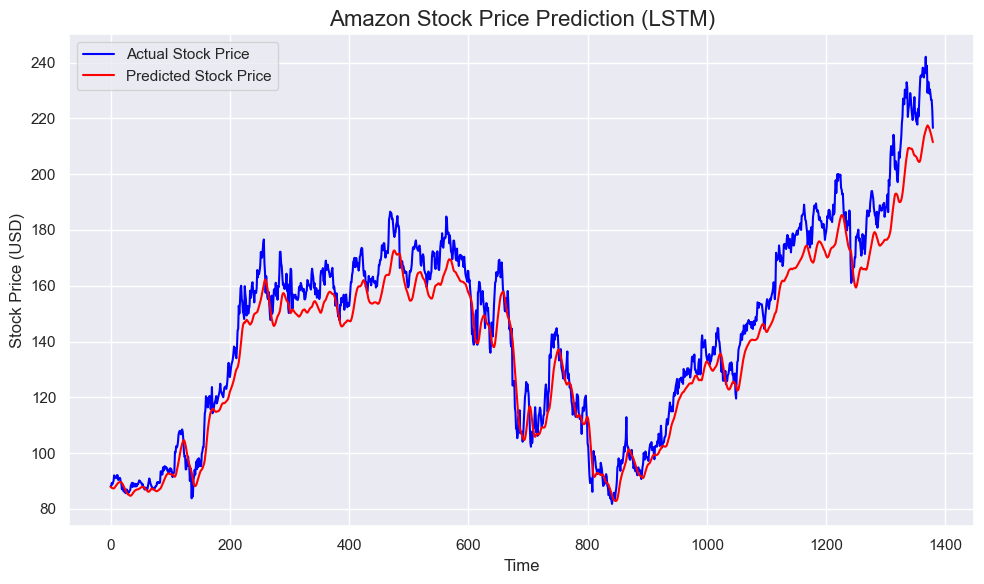

In [119]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Amazon Stock Price Prediction (LSTM)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('../images/lstm_stock_price_prediction.png')
plt.show()


# Predict Future Stock Prices (2030) using LSTM

In [120]:
# Use the last 60 days from the dataset to predict future stock prices
last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape(1, -1)
last_60_days = last_60_days.reshape((last_60_days.shape[0], last_60_days.shape[1], 1))

# Predict the stock price for the next day (you can extend this for more days)
future_prediction = model.predict(last_60_days)
future_prediction = scaler.inverse_transform(future_prediction)
print(f"Predicted Stock Price for Amazon in 2030: {future_prediction[0][0]:.2f}")
print("Predicting stock prices for 2030 based on historical data is uncertain.\nStock prices are affected by many external factors, such as market conditions, political events, and economic changes.\nThese factors are not accounted for in the model, making long-term predictions highly speculative.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Stock Price for Amazon in 2030: 210.02
Predicting stock prices for 2030 based on historical data is uncertain.
Stock prices are affected by many external factors, such as market conditions, political events, and economic changes.
These factors are not accounted for in the model, making long-term predictions highly speculative.
